In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import pandas_profiling
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Embedding
import plotly.express as px

In [0]:
data=pd.read_csv("/content/drive/My Drive/Projects/Banking ananlytics/bitcoin_data.csv")

In [25]:
data.head()

,Date,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),hashrate,difficulty
0,2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833,1538.751250,1.488192e+08
1,2013-10-06,BTC,120.65533,121.33866,121.85216,120.55450,1900.662831,1.892812e+08
2,2013-10-09,BTC,124.04900,123.03300,124.78350,122.59266,1721.887615,1.892812e+08
3,2013-10-12,BTC,125.92750,125.27966,126.03650,123.12966,1853.616722,1.892812e+08
4,2013-10-15,BTC,133.20333,135.24199,135.69216,130.39275,2333.487041,1.892812e+08


In [26]:
fig = px.line(data, x='Date', y='Closing Price (USD)')
fig.show()

In [27]:
pandas_profiling.ProfileReport(data)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,8
Number of observations,733
Total Missing (%),0.0%
Total size in memory,45.9 KiB
Average record size in memory,64.2 B
Numeric,2
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,5


# Standarization

In [28]:
values = data.iloc[0:,2:].values

scaler = StandardScaler()
scaler = scaler.fit(values)

normalized = scaler.transform(values)
normalized

array([[-0.7924937 , -0.7910756 , -0.78487271, -0.80763771, -0.65795066,
        -0.66218228],
       [-0.78928482, -0.79218067, -0.78585367, -0.79724559, -0.657935  ,
        -0.66216916],
       [-0.78838263, -0.79172581, -0.78509963, -0.79667661, -0.65794274,
        -0.66216916],
       ...,
       [ 1.3905144 ,  1.4792003 ,  1.44553535,  1.48285486,  3.70933385,
         3.55622067],
       [ 1.39520587,  1.39867157,  1.33983759,  1.46222238,  3.1214212 ,
         3.55622067],
       [ 1.32083287,  1.32394268,  1.27155981,  1.3850435 ,  3.54135881,
         3.55622067]])

# Splitting of dataset

In [0]:
prediction_days = 600
df_train= normalized[0:600]
df_test= normalized[600-50:]

In [0]:
def fea(data,n):
    features= []
    labels = []
    for i in range(n, len(data)):
        features.append(data[i-n:i,0:])
       
        labels.append(data[i,0:])
    features, labels = np.array(features), np.array(labels)
    return(features, labels)

In [31]:
train, labels_train= fea(df_train,50)
train.shape

(550, 50, 6)

In [32]:
test, labels_test= fea(df_test,50)
labels_test.shape

(133, 6)

# LSTM

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout

In [0]:
model = Sequential()
model.add(LSTM(100, input_shape=(train.shape[1], 6)))
model.add(Dense(6))

In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Train on 550 samples, validate on 133 samples
Epoch 1/50
 - 1s - loss: 0.6886 - val_loss: 1.9327
Epoch 2/50
 - 0s - loss: 0.3885 - val_loss: 1.4036
Epoch 3/50
 - 0s - loss: 0.1943 - val_loss: 1.0100
Epoch 4/50
 - 0s - loss: 0.1082 - val_loss: 0.7740
Epoch 5/50
 - 0s - loss: 0.0968 - val_loss: 0.6703
Epoch 6/50
 - 0s - loss: 0.0904 - val_loss: 0.5718
Epoch 7/50
 - 0s - loss: 0.0704 - val_loss: 0.4705
Epoch 8/50
 - 0s - loss: 0.0548 - val_loss: 0.4423
Epoch 9/50
 - 0s - loss: 0.0489 - val_loss: 0.4486
Epoch 10/50
 - 0s - loss: 0.0452 - val_loss: 0.4417
Epoch 11/50
 - 0s - loss: 0.0409 - val_loss: 0.4066
Epoch 12/50
 - 0s - loss: 0.0361 - val_loss: 0.3641
Epoch 13/50
 - 0s - loss: 0.0324 - val_loss: 0.3382
Epoch 14/50
 - 0s - loss: 0.0296 - val_loss: 0.3247
Epoch 15/50
 - 0s - loss: 0.0274 - val_loss: 0.3139
Epoch 16/50
 - 0s - loss: 0.0254 - val_loss: 0.3039
Epoch 17/50
 - 0s - loss: 0.0235 - val_loss: 0.2923
Epoch 18/50
 - 0s - loss: 0.0220 - val_loss: 0.2801
Epoch 19/50
 - 0s - loss: 0

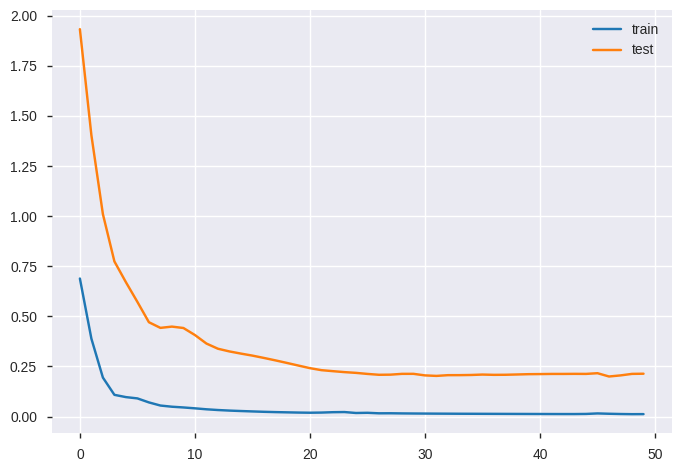

In [36]:
history=model.fit(train, labels_train, epochs = 50, batch_size = 150, validation_data=(test, labels_test), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Mean square error (MSE)

In [37]:
trainPredict = model.predict(train)
testPredict = model.predict(test)
from sklearn.metrics import mean_squared_error
mean_squared_error(labels_test[0:,0], testPredict[0:,0])

0.18213032776285212

In [38]:
mean_squared_error(labels_train, trainPredict)

0.011512494197501335